In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
from sklearn.cross_validation import train_test_split

Using TensorFlow backend.
/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import keras_tqdm

In [3]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# y_train.shape is 2d, (50000, 1). While Keras is smart enough to handle this
# it's a good idea to flatten the array.
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

(X_train,X_valid, y_train, y_valid) = train_test_split(X_train,y_train, train_size=0.7)

In [4]:
y_valid.shape

(15000,)

In [5]:
from keras_tqdm import TQDMNotebookCallback

In [6]:
def LeNetKeras(input_shape,num_classes,dropout=.5, metrics=['accuracy']):
    """
    Implement classic lenet architecture in keras
    """
    
    model = Sequential()
    model.add(Conv2D(6, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(16, (5, 5), activation='relu'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(84, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.sparse_categorical_crossentropy,
                  optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy'])
    
    return model

In [7]:
batch_size=128
epochs=100

In [26]:
model = LeNetKeras((32,32,3),10,dropout=.4)

In [27]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [28]:
hh = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(X_valid, y_valid), 
          callbacks=[early_stopping])

Train on 35000 samples, validate on 15000 samples
Epoch 1/100
4s - loss: 2.6186 - acc: 0.1185 - val_loss: 2.2456 - val_acc: 0.1657
Epoch 2/100
3s - loss: 2.2470 - acc: 0.1595 - val_loss: 2.1717 - val_acc: 0.2020
Epoch 3/100
3s - loss: 2.1945 - acc: 0.1807 - val_loss: 2.1599 - val_acc: 0.1935
Epoch 4/100
3s - loss: 2.1441 - acc: 0.2018 - val_loss: 2.0532 - val_acc: 0.2590
Epoch 5/100
3s - loss: 2.0585 - acc: 0.2444 - val_loss: 1.9167 - val_acc: 0.3037
Epoch 6/100
3s - loss: 1.9366 - acc: 0.2858 - val_loss: 1.9139 - val_acc: 0.2959
Epoch 7/100
3s - loss: 1.8476 - acc: 0.3188 - val_loss: 1.7824 - val_acc: 0.3580
Epoch 8/100
3s - loss: 1.7763 - acc: 0.3441 - val_loss: 1.6806 - val_acc: 0.3902
Epoch 9/100
3s - loss: 1.7275 - acc: 0.3682 - val_loss: 1.7434 - val_acc: 0.3823
Epoch 10/100
3s - loss: 1.6802 - acc: 0.3877 - val_loss: 1.5709 - val_acc: 0.4341
Epoch 11/100
3s - loss: 1.6253 - acc: 0.4052 - val_loss: 1.5662 - val_acc: 0.4471
Epoch 12/100
3s - loss: 1.5936 - acc: 0.4226 - val_loss: 

In [29]:
%matplotlib inline

In [30]:
from matplotlib import pyplot as plt

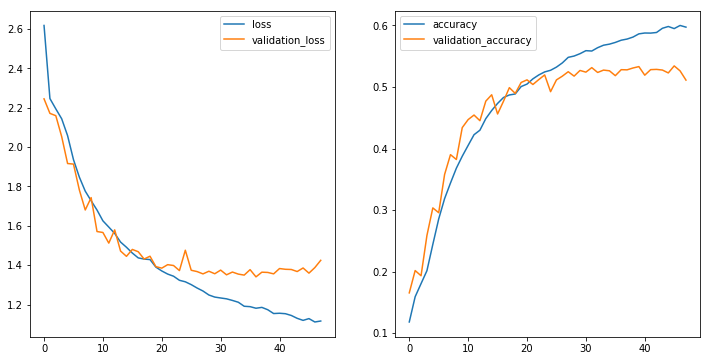

In [31]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)

plt.plot(hh.history['loss'])
plt.plot(hh.history['val_loss'])
plt.legend(['loss','validation_loss'])
plt.subplot(1,2,2)
plt.plot(hh.history['acc'])
plt.plot(hh.history['val_acc'])
plt.legend(['accuracy','validation_accuracy'])

In [32]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.40919818592
Test accuracy: 0.5138


In [ ]:
import gc; gc.collect();